In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target.shape

(150,)

In [7]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
iris.target[:5,]

array([0, 0, 0, 0, 0])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test =  train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.3)

In [11]:
X_train.shape

(105, 4)

In [12]:
X_test.shape

(45, 4)

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
gnb = GaussianNB()

In [17]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
y_pred = gnb.predict(X_test)

In [20]:
y_pred

array([2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2,
       0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2,
       1])

In [21]:
y_test

array([2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2,
       0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2,
       1])

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, y_pred)

0.9111111111111111

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier()

In [26]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
y_pred = dt.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.8888888888888888

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
neigh = KNeighborsClassifier(n_neighbors=5, 
                             metric='minkowski', p=2) #1==manhattan, 2==euclidian

In [31]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
accuracy_score(y_test, neigh.predict(X_test))

0.9555555555555556

In [33]:
from sklearn.svm import SVC

In [34]:
svc = SVC(kernel='linear')

In [35]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [36]:
y_pred = svc.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred) #자리 상관x

0.9777777777777777

In [39]:
import numpy as np
x = np.arange(0,1, 0.1)
y = np.arange(0,1, 0.2)

In [40]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [41]:
y

array([0. , 0.2, 0.4, 0.6, 0.8])

In [42]:
xx, yy = np.meshgrid(x, y)

In [43]:
xx

array([[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]])

In [44]:
yy

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]])

In [47]:
xx.ravel() #하나의 vector로 바꿈

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0. , 0.1, 0.2,
       0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0. , 0.1, 0.2, 0.3, 0.4, 0.5,
       0.6, 0.7, 0.8, 0.9, 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
       0.9, 0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [48]:
cxy = np.c_[xx.ravel(), yy.ravel()]

In [51]:
cxy

array([[0. , 0. ],
       [0.1, 0. ],
       [0.2, 0. ],
       [0.3, 0. ],
       [0.4, 0. ],
       [0.5, 0. ],
       [0.6, 0. ],
       [0.7, 0. ],
       [0.8, 0. ],
       [0.9, 0. ],
       [0. , 0.2],
       [0.1, 0.2],
       [0.2, 0.2],
       [0.3, 0.2],
       [0.4, 0.2],
       [0.5, 0.2],
       [0.6, 0.2],
       [0.7, 0.2],
       [0.8, 0.2],
       [0.9, 0.2],
       [0. , 0.4],
       [0.1, 0.4],
       [0.2, 0.4],
       [0.3, 0.4],
       [0.4, 0.4],
       [0.5, 0.4],
       [0.6, 0.4],
       [0.7, 0.4],
       [0.8, 0.4],
       [0.9, 0.4],
       [0. , 0.6],
       [0.1, 0.6],
       [0.2, 0.6],
       [0.3, 0.6],
       [0.4, 0.6],
       [0.5, 0.6],
       [0.6, 0.6],
       [0.7, 0.6],
       [0.8, 0.6],
       [0.9, 0.6],
       [0. , 0.8],
       [0.1, 0.8],
       [0.2, 0.8],
       [0.3, 0.8],
       [0.4, 0.8],
       [0.5, 0.8],
       [0.6, 0.8],
       [0.7, 0.8],
       [0.8, 0.8],
       [0.9, 0.8]])

In [52]:
zz = np.sqrt(xx**2 + yy**2)

In [53]:
import matplotlib.pyplot as plt

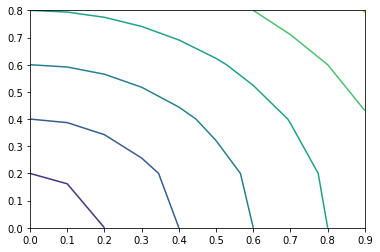

In [55]:
plt.contour(xx, yy, zz) #contourf 는 fill
plt.show()